## Prediction Comparison Data preparation

Data preparation for the time span in June that was used for comparing to numerical and in-situ data. 

In [3]:
# import all necessary libraries
import os
from datetime import datetime, timedelta
import getpass
import xarray as xr
!python -m pip install motuclient==1.8.4 --no-cache-dir
import motuclient
import xarray as xr
import numpy as np
!python -m pip install ffmpeg==1.4
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import pandas as pd
from tqdm import tqdm
!python -m pip install netCDF4
import netCDF4 as nc
import datetime as dt
from netCDF4 import Dataset, num2date
import h5py

  Preparing metadata (setup.py) ... done
  Created wheel for motuclient: filename=motuclient-1.8.4-py3-none-any.whl size=32873 sha256=9c923619d44e848db4dad5714b4d17e25d33c8b798edb5a4b67a119638f3b73a
  Stored in directory: /tmp/pip-ephem-wheel-cache-084hmzn1/wheels/46/74/d1/ee3216f52d83212f10a0a5f5b94f3d99cf3d29b8ecf09c60b6
Successfully built motuclient
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=055e3707793e94a15f69471526a4abb408523a5ffb566a7c5b7419d42b2949a6
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.0 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
riga_range_x  = range(720,880,1)
riga_range_y = range(330,490,1)

kattegat_range_x  = range(50,210,1)
kattegat_range_y = range(200,360,1)

gotland_range_x  = range(470,630,1)
gotland_range_y = range(160,320,1)

In [ ]:
# directories for landmask file
input_dir_RIGA = r'/content/drive/MyDrive/MasterThesis/Data/CHL_1km/values_Riga'
input_dir_KTT = r'/content/drive/MyDrive/MasterThesis/Data/CHL_1km/values_Kattegat'
input_dir_GTL = r'/content/drive/MyDrive/MasterThesis/Data/CHL_1km/values_Gotland'

In [6]:
chl_dir_init = r'/content/drive/MyDrive/MasterThesis/Data/CHL_1km'
chl_data_init = xr.open_mfdataset(f"{chl_dir_init}/CHL_data_17122018_to_612019.nc", decode_coords="all")
chl_data_init = chl_data_init.sel(time=~chl_data_init.get_index("time").duplicated())
chl_data_init = chl_data_init.rename_dims({'lon': 'x', 'lat': 'y'}).rename_vars({"lon": "x", "lat": "y"}).set_coords(["x", "y"])
lat_lon_subset = chl_data_init[['x', 'y']]

In [ ]:
data_dir = r'/content/drive/MyDrive/MasterThesis/Predictions/Data'
chl_data = xr.open_mfdataset(f"{data_dir}/CHL_data_"+"*.nc")
chl_data = chl_data.resample(time='1D').asfreq()
#chl_data = chl_data.sel(time=~chl_data.get_index("time").duplicated())
chl_data = chl_data.rename_dims({'lon': 'x', 'lat': 'y'}).rename_vars({"lon": "x", "lat": "y"}).set_coords(["x", "y"])
chl_data = chl_data.interp_like(lat_lon_subset, method='linear')

chl_data_RIGA = chl_data.isel(x=riga_range_x, y= riga_range_y)
chl_data_KTT = chl_data.isel(x=kattegat_range_x, y= kattegat_range_y)
chl_data_GTL = chl_data.isel(x=gotland_range_x, y= gotland_range_y)

SST_data = xr.open_mfdataset(f"{data_dir}/SST_data_"+"*.nc")
SST_data = SST_data.resample(time='1D').mean('time')
SST_data = SST_data.rename_dims({'lon': 'x', 'lat': 'y'}).rename_vars({"lon": "x", "lat": "y"}).set_coords(["x", "y"])
SST_data = SST_data.interp_like(lat_lon_subset, method='linear')
SST_data_RIGA = SST_data.isel(x=riga_range_x, y= riga_range_y)
SST_data_KTT = SST_data.isel(x=kattegat_range_x, y= kattegat_range_y)
SST_data_GTL = SST_data.isel(x=gotland_range_x, y= gotland_range_y)

WH_data = xr.open_mfdataset(f"{data_dir}/WH_new_data_"+"*.nc")
WH_data = WH_data.rename_dims({'lon': 'x', 'lat': 'y'}).rename_vars({"lon": "x", "lat": "y"}).set_coords(["x", "y"])
WH_data = WH_data.resample(time='1D').mean('time')
WH_data = WH_data.interp_like(lat_lon_subset, method='linear')
WH_data_RIGA = WH_data.isel(x=riga_range_x, y= riga_range_y)
WH_data_KTT = WH_data.isel(x=kattegat_range_x, y= kattegat_range_y)
WH_data_GTL = WH_data.isel(x=gotland_range_x, y= gotland_range_y)

/usr/local/lib/python3.10/dist-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [ ]:
chl = chl_data['CHL'].values
print(np.nanmax(chl))

for c in range(chl.shape[0]):
  plt.figure()
  plt.imshow(chl[c,:,:], vmin=0, vmax=40)
  plt.show()

Generate 7 20 day blocks for the gap filling and prediction. The time ranges for the blocks are: (1) 18.04.-07.05., (2) 21.04. - 10.05., (3) 25.04. - 14.05., (4) 28.04. - 17.05. (5) 02.05. - 21.05., (6) 06.05. - 25.05., (7) 10.05. - 29.05

### CHL Data

In [ ]:
CHL_total_RIGA = np.empty((5,20,160,160))
CHL_total_KTT = np.empty((5,20,160,160))
CHL_total_GTL = np.empty((5,20,160,160))

CHL_total_RIGA[:]  = np.nan
CHL_total_KTT[:]  = np.nan
CHL_total_GTL[:]  = np.nan

def expand_arrays(expected_times, i):
  print(expected_times[0])
  if i == 0:
    riga = chl_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,4:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,4:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,4:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,4:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,4:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,4:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
  if i == 1:
    riga = chl_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,3:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,3:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,3:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
  if i == 2:
    riga = chl_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,2:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,2:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,2:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
  if i == 3:
    riga = chl_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,1:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,1:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,1:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
  if i == 4:
    riga = chl_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,0:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,0:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,0:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data


# first block
expected_times_1 = pd.date_range(start="2023-06-04", end="2023-06-19", freq='D')
expand_arrays(expected_times_1, 0)

# second block
expected_times_2 = pd.date_range(start="2023-06-04", end="2023-06-20", freq='D')
expand_arrays(expected_times_2, 1)

# third block
expected_times_3 = pd.date_range(start="2023-06-04", end="2023-06-21", freq='D')
expand_arrays(expected_times_3, 2)

# forth block
expected_times_4 = pd.date_range(start="2023-06-04", end="2023-06-22", freq='D')
expand_arrays(expected_times_4, 3)

# fifth block
expected_times_5 = pd.date_range(start="2023-06-04", end="2023-06-23", freq='D')
expand_arrays(expected_times_5, 4)

2023-06-04 00:00:00
2023-06-04 00:00:00
2023-06-04 00:00:00
2023-06-04 00:00:00
2023-06-04 00:00:00


In [ ]:
def write_to_nc(input_dir, chl_np_array, time_array, name):
  # read the mask
  mask_file = r'/mask.npy'
  mask_data = np.load(f'{input_dir}/{mask_file}')
  landmask = np.where(mask_data == 0, 1, 0)
  longitudes = np.loadtxt(f'{input_dir}/longitudes.txt')
  latitudes = np.loadtxt(f'{input_dir}/latitudes.txt')
  chl_np_array = np.where(landmask==1,chl_np_array, np.nan)
  time_units = f"days since 1900-01-01 00:00:00"
  ds = nc.Dataset(name, 'w', format='NETCDF4', engine='h5netcdf')

  time = ds.createDimension('time', None)
  lat = ds.createDimension('lat', chl_np_array.shape[1])
  lon = ds.createDimension('lon', chl_np_array.shape[2])

  timeseries = ds.createVariable('time', float, ('time',))
  lats = ds.createVariable('lat', float, ('lat',))
  lons = ds.createVariable('lon', float, ('lon',))
  value = ds.createVariable('CHL', float, ('time', 'lat', 'lon',), fill_value=-9999.0)
  timeseries.units = time_units

  mask_value = ds.createVariable('mask', float, ('lat', 'lon',))

  lats[:] = latitudes
  lons[:] = longitudes

  chl_np_array[np.isnan(chl_np_array)] = -9999.0
  value[:,:,:] = chl_np_array
  mask_value[:,:] = landmask


  mdate = np.array([(t_ - dt.datetime(1900, 1, 1)).total_seconds() / (24 * 60 * 60) for t_ in time_array])
  timeseries[:] = mdate
  ds.close()
times={
    0: expected_times_1,
    1: expected_times_2,
    2: expected_times_3,
    3: expected_times_4,
    4: expected_times_5
}
for i in range(CHL_total_GTL.shape[0]):
  write_to_nc(input_dir_GTL, CHL_total_GTL[i], times[i], f"{data_dir}\GTL_nc_{i}.nc")


In [ ]:
ds = Dataset(f"{data_dir}/KTT_nc_0.nc")

In [ ]:
data = ds.variables['CHL'][:,:,:]
land_mask = ds.variables['mask'][:,:]

In [1]:
# for i in range(data.shape[0]):
#   plt.figure()
#   plt.imshow(data[i,:,:])
#   plt.show()

In [2]:
# for i in range(CHL_total_RIGA.shape[0]):
#   print(i)
#   for j in range(CHL_total_RIGA.shape[1]):
#     print(j)
#     plt.figure()
#     plt.imshow(CHL_total_RIGA[i,j,:,:], origin='lower', vmin=0, vmax=2)
#     plt.colorbar()
#     plt.show()

In [ ]:
np.save(f"{data_dir}/CHL_RIGA.npy", CHL_total_RIGA)
np.save(f"{data_dir}/CHL_KTT.npy", CHL_total_KTT)
np.save(f"{data_dir}/CHL_GTL.npy", CHL_total_GTL)

## CHL Data Truth of Predicted data

In [8]:
data_dir = r'/content/drive/MyDrive/MasterThesis/Predictions/Data'
chl_data = xr.open_mfdataset(f"{data_dir}/CHL_data_2062023_to_1272023.nc")
chl_data = chl_data.resample(time='1D').asfreq()
#chl_data = chl_data.sel(time=~chl_data.get_index("time").duplicated())
chl_data = chl_data.rename_dims({'lon': 'x', 'lat': 'y'}).rename_vars({"lon": "x", "lat": "y"}).set_coords(["x", "y"])
chl_data = chl_data.interp_like(lat_lon_subset, method='linear')

chl_data_RIGA = chl_data.isel(x=riga_range_x, y= riga_range_y)
chl_data_KTT = chl_data.isel(x=kattegat_range_x, y= kattegat_range_y)
chl_data_GTL = chl_data.isel(x=gotland_range_x, y= gotland_range_y)

In [9]:
chl_data

<xarray.Dataset>
Dimensions:  (time: 8, y: 1147, x: 1185)
Coordinates:
  * time     (time) datetime64[ns] 2023-06-22 2023-06-23 ... 2023-06-29
  * y        (y) float32 53.26 53.27 53.28 53.29 ... 65.81 65.82 65.83 65.84
  * x        (x) float32 9.259 9.277 9.294 9.312 ... 30.19 30.21 30.22 30.24
Data variables:
    CHL      (time, y, x) float32 dask.array<chunksize=(1, 1147, 1185), meta=np.ndarray>
Attributes: (12/44)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    institution:             CNR-GOS
    ...                      ...
    cmems_product_id:        OCEANCOLOUR_BAL_BGC_L3_NRT_009_131
    History:                 Translated to CF-1.0 Conventions by Netcdf-Java ...
    geospatial_lat_min:      53.251346588134766
    geospatial_lat_max:      65.8486557006836
    geospatial_lon_min:      9.252659797668457
    geospatial_lon_max:      30.24734115600586

In [11]:
CHL_total_RIGA = np.empty((5,5,160,160))
CHL_total_KTT = np.empty((5,5,160,160))
CHL_total_GTL = np.empty((5,5,160,160))

CHL_total_RIGA[:]  = np.nan
CHL_total_KTT[:]  = np.nan
CHL_total_GTL[:]  = np.nan

def expand_arrays(expected_times, i):
  print(expected_times[0])
  if i == 0:
    riga = chl_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,2:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,2:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,2:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,2:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,2:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,2:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
  if i == 1:
    riga = chl_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,1:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,1:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,1:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
  if i == 2:
    riga = chl_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
  if i == 3:
    riga = chl_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
  if i == 4:
    riga = chl_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_RIGA[i,:,:,:]= np.where(riga>=1, riga, np.nan)
    CHL_total_KTT[i,:,:,:]= chl_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data
    CHL_total_GTL[i,:,:,:]= chl_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['CHL'].data


# first block
expected_times_1 = pd.date_range(start="2023-06-20", end="2023-06-24", freq='D')
expand_arrays(expected_times_1, 0)

# second block
expected_times_2 = pd.date_range(start="2023-06-21", end="2023-06-25", freq='D')
expand_arrays(expected_times_2, 1)

# third block
expected_times_3 = pd.date_range(start="2023-06-22", end="2023-06-26", freq='D')
expand_arrays(expected_times_3, 2)

# forth block
expected_times_4 = pd.date_range(start="2023-06-23", end="2023-06-27", freq='D')
expand_arrays(expected_times_4, 3)

# fifth block
expected_times_5 = pd.date_range(start="2023-06-24", end="2023-06-28", freq='D')
expand_arrays(expected_times_5, 4)

2023-06-20 00:00:00
2023-06-21 00:00:00
2023-06-22 00:00:00
2023-06-23 00:00:00
2023-06-24 00:00:00


In [14]:
for i in range(CHL_total_GTL.shape[0]):
  print(i)
  for j in range(CHL_total_GTL.shape[1]):
    print(j)
    plt.figure()
    plt.imshow(CHL_total_GTL[i,j,:,:], origin='lower', vmin=0, vmax=5)
    plt.colorbar()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [15]:
np.save(f"{data_dir}/True_CHL_RIGA.npy", CHL_total_RIGA)
np.save(f"{data_dir}/True_CHL_KTT.npy", CHL_total_KTT)
np.save(f"{data_dir}/True_CHL_GTL.npy", CHL_total_GTL)

### Ocean Data

In [ ]:
WH_data_RIGA

<xarray.Dataset>
Dimensions:  (time: 31, y: 160, x: 160)
Coordinates:
  * time     (time) datetime64[ns] 2023-06-01 2023-06-02 ... 2023-07-01
  * x        (x) float32 22.02 22.04 22.05 22.07 ... 24.78 24.8 24.82 24.84
  * y        (y) float32 56.88 56.89 56.9 56.91 ... 58.59 58.61 58.62 58.63
Data variables:
    VHM0     (time, y, x) float32 dask.array<chunksize=(1, 160, 160), meta=np.ndarray>
    VMDR     (time, y, x) float32 dask.array<chunksize=(1, 160, 160), meta=np.ndarray>
Attributes: (12/14)
    Conventions:                                CF-1.0
    source:                                     FMI-WAM_CMEMS
    institution:                                Baltic MFC, PU Finnish Meteor...
    title:                                      CMEMS WAM model fields (hourly)
    cmems_product_id:                           BALTICSEA_ANALYSISFORECAST_WA...
    FROM_ORIGINAL_FILE__westernmost_longitude:  9.0138
    ...                                         ...
    FROM_ORIGINAL_FILE__northernmost_latitude:  65.9081
    grid_resolution:                            1 nautical mile (ie. 0.0167 d...
    _CoordSysBuilder:                           ucar.nc2.dataset.conv.CF1Conv...
    references:                                  
    comment:                                    
    history:                                    Data extracted from dataset h...

In [ ]:
WH_VHM0_total_RIGA = np.empty((5,20,160,160))
WH_VHM0_total_KTT = np.empty((5,20,160,160))
WH_VHM0_total_GTL = np.empty((5,20,160,160))

WH_VMDR_total_RIGA = np.empty((5,20,160,160))
WH_VMDR_total_KTT = np.empty((5,20,160,160))
WH_VMDR_total_GTL = np.empty((5,20,160,160))

SST_total_RIGA = np.empty((5,20,160,160))
SST_total_KTT = np.empty((5,20,160,160))
SST_total_GTL = np.empty((5,20,160,160))

def expand_arrays(expected_times, i):
  print(expected_times[0])
  WH_VHM0_total_RIGA[i,:,:,:]= WH_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['VHM0'].data
  WH_VMDR_total_RIGA[i,:,:,:]= WH_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['VMDR'].data
  SST_total_RIGA[i,:,:,:]= SST_data_RIGA.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['analysed_sst'].data
  WH_VHM0_total_KTT[i,:,:,:]= WH_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['VHM0'].data
  WH_VMDR_total_KTT[i,:,:,:]= WH_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['VMDR'].data
  SST_total_KTT[i,:,:,:]= SST_data_KTT.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['analysed_sst'].data
  WH_VHM0_total_GTL[i,:,:,:]= WH_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['VHM0'].data
  WH_VMDR_total_GTL[i,:,:,:]= WH_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['VMDR'].data
  SST_total_GTL[i,:,:,:]= SST_data_GTL.sel(time=slice(str(expected_times[0]), str(expected_times[-1])))['analysed_sst'].data


# first block
expected_times = pd.period_range(start="2023-05-31", end="2023-06-19", freq='D')
expand_arrays(expected_times, 0)

# second block
expected_times = pd.period_range(start="2023-06-01", end="2023-06-20", freq='D')
expand_arrays(expected_times, 1)

# third block
expected_times = pd.period_range(start="2023-06-02", end="2023-06-21", freq='D')
expand_arrays(expected_times, 2)

# forth block
expected_times = pd.period_range(start="2023-06-03", end="2023-06-22", freq='D')
expand_arrays(expected_times, 3)

# fifth block
expected_times = pd.period_range(start="2023-06-04", end="2023-06-23", freq='D')
expand_arrays(expected_times, 4)


2023-05-31
2023-06-01
2023-06-02
2023-06-03
2023-06-04


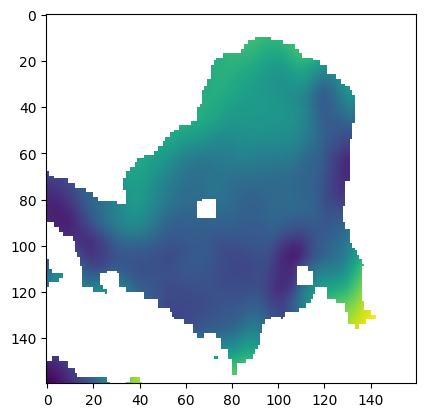

In [ ]:
plt.figure()
plt.imshow(SST_total_RIGA[0,0,:,:])
plt.show()

In [ ]:
np.save(f"{data_dir}/VHM0_RIGA.npy", WH_VHM0_total_RIGA)
np.save(f"{data_dir}/VHM0_KTT.npy", WH_VHM0_total_KTT)
np.save(f"{data_dir}/VHM0_GTL.npy", WH_VHM0_total_GTL)

np.save(f"{data_dir}/VMDR_RIGA.npy", WH_VMDR_total_RIGA)
np.save(f"{data_dir}/VMDR_KTT.npy", WH_VMDR_total_KTT)
np.save(f"{data_dir}/VMDR_GTL.npy", WH_VMDR_total_GTL)

np.save(f"{data_dir}/SST_RIGA.npy", SST_total_RIGA)
np.save(f"{data_dir}/SST_KTT.npy", SST_total_KTT)
np.save(f"{data_dir}/SST_GTL.npy", SST_total_GTL)

## Numerical Data

Looping through all the files in the numerical model dataset and extracting the valid date range. 7 Prediction ranges are available:

(1) 08.05. - 12.05.
(2) 11.05. - 15.05.
(3) 15.05. - 19.05.
(4) 18.05. - 21.05.
(5) 22.05. - 26.05.
(6) 26.05. - 30.05.
(7) 30.05. - 03.06.

In [3]:
path = r'/content/drive/MyDrive/MasterThesis/Data/Numerical_Forecasts'
file = "CHL_NumForecast_data_3152023_to_2762023.nc"
num_data = xr.open_mfdataset(os.path.join(path,file))
num_data

<xarray.Dataset>
Dimensions:  (depth: 1, time: 26, lat: 774, lon: 763)
Coordinates:
  * depth    (depth) float32 0.5016
  * lon      (lon) float32 9.041 9.069 9.097 9.125 ... 30.13 30.15 30.18 30.21
  * time     (time) datetime64[ns] 2023-05-31T12:00:00 ... 2023-06-25T12:00:00
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 65.84 65.86 65.87 65.89
Data variables:
    chl      (time, depth, lat, lon) float32 dask.array<chunksize=(26, 1, 774, 763), meta=np.ndarray>
Attributes: (12/20)
    comment:                                    Data on cropped native produc...
    grid_resolution:                            ~1 nautical mile (1min latitu...
    title:                                      CMEMS ERGOM daily integrated ...
    Conventions:                                CF-1.0
    source:                                     CMEMS BAL MFC NEMO model outp...
    contact:                                    servicedesk.cmems@mercator-oc...
    ...                                         ...
    FROM_ORIGINAL_FILE__northernmost_latitude:  65.89099
    FROM_ORIGINAL_FILE__westernmost_longitude:  9.041488
    FROM_ORIGINAL_FILE__southernmost_latitude:  53.008297
    start_date:                                 2023-06-25 12:00:00
    _CoordSysBuilder:                           ucar.nc2.dataset.conv.CF1Conv...
    history:                                    Data extracted from dataset h...

In [11]:
# this is the directory where the numerical data lies
path = r'/content/drive/MyDrive/MasterThesis/Data/Numerical_Forecasts'

num_preds_RIGA = np.empty((5,5,160,160))
num_preds_KTT = np.empty((5,5,160,160))
num_preds_GTL = np.empty((5,5,160,160))

i = 1
for file in os.listdir(path):
  if file.endswith(".nc"):
    num_data = xr.open_mfdataset(os.path.join(path,file))
    time_start = num_data.time[-5:][0]
    time_end = num_data.time[-5:][-1]
    print("Time start")
    print(time_start)
    print("Time end")
    print(time_end)
    data = num_data.sel(time=slice(time_start,time_end))
    data = data.rename_dims({'lon': 'x', 'lat': 'y'}).rename_vars({"lon": "x", "lat": "y"}).set_coords(["x", "y"])
    data = data.interp_like(lat_lon_subset, method='linear').compute()

    data_RIGA = data.isel(x=riga_range_x, y= riga_range_y)
    data_KTT = data.isel(x=kattegat_range_x, y= kattegat_range_y)
    data_GTL = data.isel(x=gotland_range_x, y= gotland_range_y)

    num_preds_RIGA[-5:, :, :, :] = data_RIGA['chl'].data[:,0,:,:]
    num_preds_KTT[-5:, :, :, :] = data_KTT['chl'].data[:,0,:,:]
    num_preds_GTL[-5:, :, :, :] = data_GTL['chl'].data[:,0,:,:]


Time start
<xarray.DataArray 'time' ()>
array('2023-06-20T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-06-20T12:00:00
Attributes:
    long_name:            time
    standard_name:        time
    axis:                 T
    _ChunkSizes:          512
    _CoordinateAxisType:  Time
    valid_min:            45074.5
    valid_max:            45099.5
Time end
<xarray.DataArray 'time' ()>
array('2023-06-24T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-06-24T12:00:00
Attributes:
    long_name:            time
    standard_name:        time
    axis:                 T
    _ChunkSizes:          512
    _CoordinateAxisType:  Time
    valid_min:            45074.5
    valid_max:            45099.5
Time start
<xarray.DataArray 'time' ()>
array('2023-06-21T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-06-21T12:00:00
Attributes:
    long_name:            time
    s

In [ ]:
print(num_preds_RIGA.shape)

(5, 5, 160, 160)


In [ ]:
np.save(f"{data_dir}/num_forecast_RIGA.npy", num_preds_RIGA)
np.save(f"{data_dir}/num_forecast_KTT.npy", num_preds_KTT)
np.save(f"{data_dir}/num_forecast_GTL.npy", num_preds_GTL)